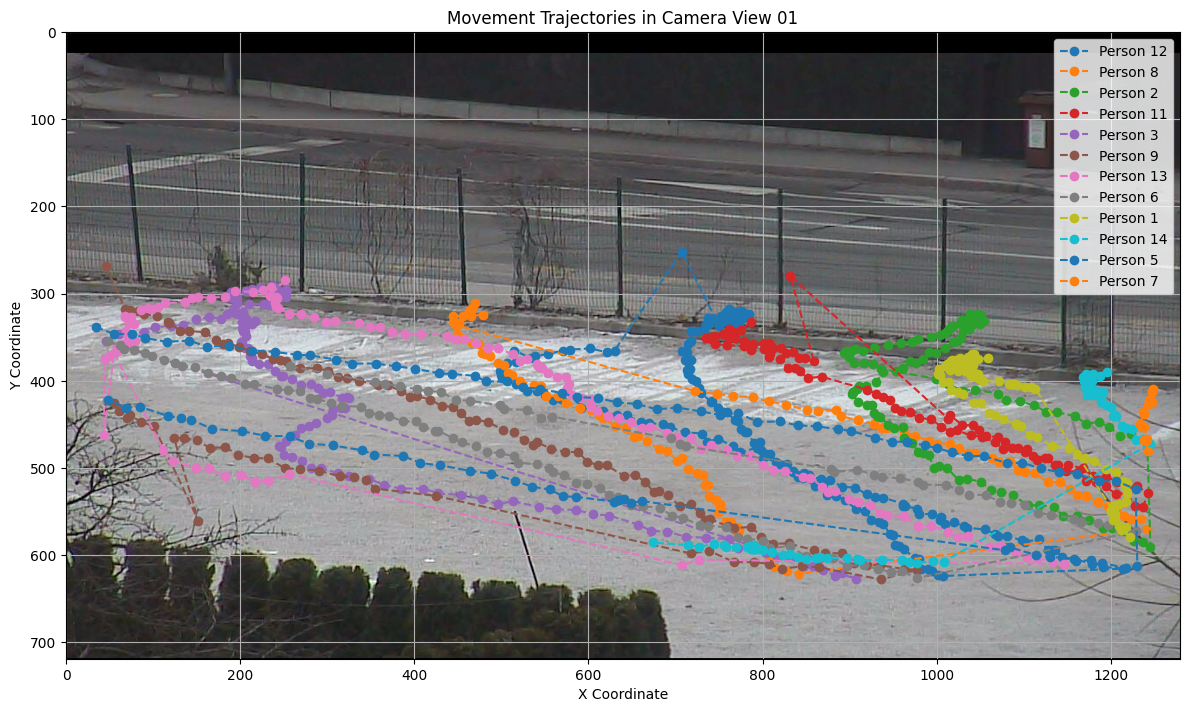

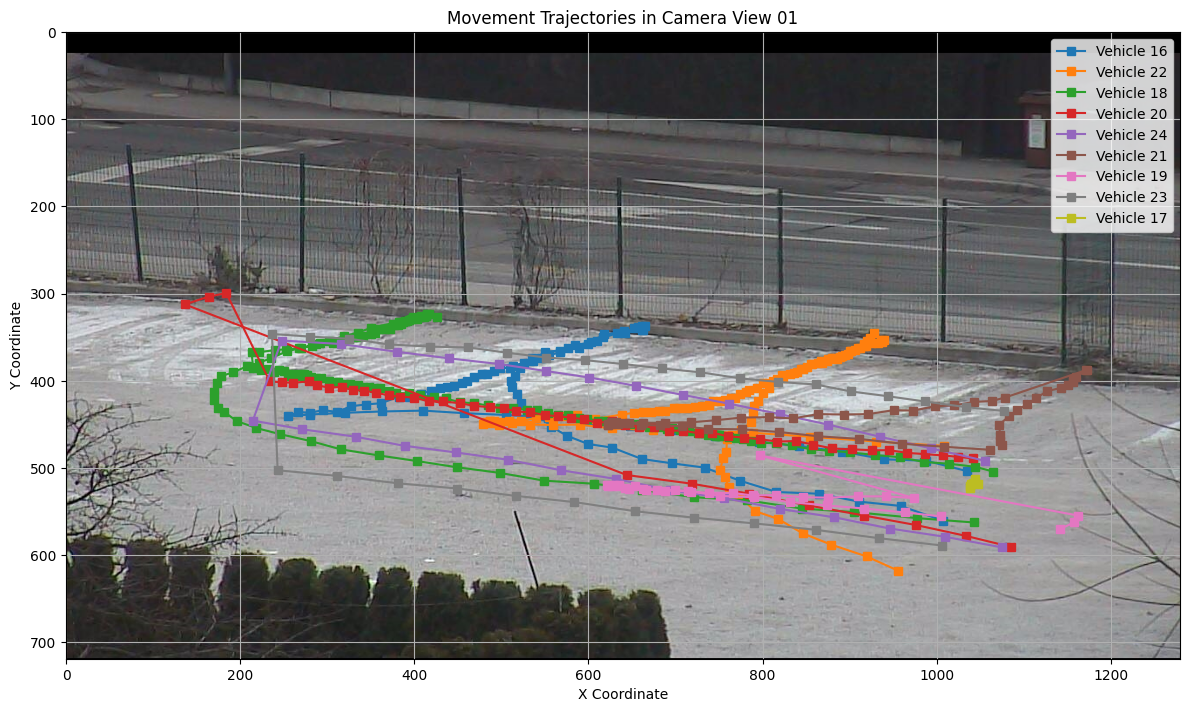

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2  # OpenCV for loading images
from collections import defaultdict

# Path to the root 'views' directory containing the 36 directories
root_dir = 'D:/Dataset/dana36/views'
# Path to the backgrounds directory containing the background images
background_dir = 'D:/Dataset/dana36/backgrounds'

# Choose a specific camera view to analyze
selected_view = '01'  # You can change this to any camera view (01 to 36)
annotations_dir = os.path.join(root_dir, selected_view, 'annotations')
background_image_path = os.path.join(background_dir, f'{selected_view}.jpg')

# Load the background image
background_image = cv2.imread(background_image_path)
if background_image is None:
    raise FileNotFoundError(f'Background image {selected_view}.jpg not found in {background_dir}')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)  # Convert to RGB for plotting

# Get the image dimensions
image_height, image_width, _ = background_image.shape

# Initialize dictionaries to store trajectories for people and vehicles
people_trajectories = defaultdict(list)  # Key: person index (0-14), Value: list of (x_center, y_center)
vehicle_trajectories = defaultdict(list)  # Key: vehicle index (0-8), Value: list of (x_center, y_center)

# Loop through each .txt file in the 'annotations' directory in sorted order (frame sequence)
for annotation_file in sorted(os.listdir(annotations_dir)):
    if annotation_file.endswith('.txt'):
        # Read the content of the .txt file
        with open(os.path.join(annotations_dir, annotation_file), 'r') as file:
            lines = file.readlines()

        # Process each line in the annotation file
        for i, line in enumerate(lines):
            values = list(map(int, line.strip().split(',')))
            if values != [0, 0, 0, 0]:  # If bounding box is non-zero
                x_min, y_min, x_max, y_max = values
                x_center = (x_min + x_max) / 2
                y_center = (y_min + y_max) / 2

                # Separate people and vehicles
                if 0 <= i < 15:  # People (1–15)
                    people_trajectories[i].append((x_center, y_center))
                elif 15 <= i < 24:  # Vehicles (16–24)
                    vehicle_trajectories[i - 15].append((x_center, y_center))

# Plot the movement trajectories on the background image
plt.figure(figsize=(12, 8))
plt.imshow(background_image)
# Plot people trajectories
for person_id, trajectory in people_trajectories.items():
    trajectory = np.array(trajectory)
    plt.plot(trajectory[:, 0], trajectory[:, 1], label=f'Person {person_id + 1}', linestyle='--', marker='o')
plt.title(f'Movement Trajectories in Camera View {selected_view}')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
plt.imshow(background_image)
# Plot vehicle trajectories
for vehicle_id, trajectory in vehicle_trajectories.items():
    trajectory = np.array(trajectory)
    plt.plot(trajectory[:, 0], trajectory[:, 1], label=f'Vehicle {vehicle_id + 16}', linestyle='-', marker='s')
plt.title(f'Movement Trajectories in Camera View {selected_view}')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()